<a href="https://colab.research.google.com/github/alejandro-paneso/Talent_Tech/blob/qa/AnalisisDeHurtodeMotos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

tbHurtos = pd.read_csv('/content/drive/MyDrive/talent_tech/hurto_de_moto.csv')



Mounted at /content/drive


In [ ]:
tbHurtos.head()

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha_ingestion
0,2017-01-01T23:00:00.000-05:00,1.0,6.268040,-75.549892,Hombre,29.0,Soltero(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Manrique,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2014.0,Azul,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
1,2017-01-01T20:30:00.000-05:00,1.0,6.290076,-75.556893,Hombre,22.0,Unión marital de hecho,Sin dato,Sin dato,Sin dato,...,Vía pública,Santa Cruz,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2005.0,Rojo,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
2,2017-01-01T07:00:00.000-05:00,1.0,6.304187,-75.551760,Hombre,23.0,Unión marital de hecho,Sin dato,Sin dato,Sin dato,...,Vía pública,Santa Cruz,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2011.0,Verde,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
3,2017-01-01T09:00:00.000-05:00,1.0,6.248002,-75.574849,Hombre,-1.0,Sin dato,Sin dato,Sin dato,Sin dato,...,Almacén tienda y otro,Candelaria,Moto,Vehículos de 2 o 4 ruedas,Vehículo,-1.0,Negro,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00
4,2017-01-01T16:30:00.000-05:00,1.0,6.268129,-75.557882,Hombre,34.0,Soltero(a),Sin dato,Sin dato,Sin dato,...,Parqueadero,Aranjuez,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2015.0,Negro,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00


In [ ]:
tbHurtos.describe()

#print(tbHurtos["cantidad"].mean())

,cantidad,latitud,longitud,edad,modelo
count,4919.0,3641.000000,3641.000000,4919.000000,4919.000000
mean,1.0,6.251212,-75.577842,29.081114,1862.624314
std,0.0,0.023843,0.018876,8.470587,497.415448
min,1.0,6.170967,-75.656547,-1.000000,-1.000000
25%,1.0,6.235906,-75.592913,23.000000,1992.000000
50%,1.0,6.250955,-75.575047,28.000000,1996.000000
75%,1.0,6.264587,-75.562085,34.000000,1999.000000
max,1.0,6.310679,-75.500589,73.000000,2015.000000


In [ ]:
tbHurtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fecha_hecho          5000 non-null   object 
 1   cantidad             4919 non-null   float64
 2   latitud              3641 non-null   float64
 3   longitud             3641 non-null   float64
 4   sexo                 4919 non-null   object 
 5   edad                 4919 non-null   float64
 6   estado_civil         4919 non-null   object 
 7   grupo_actor          4919 non-null   object 
 8   actividad_delictiva  4919 non-null   object 
 9   parentesco           4919 non-null   object 
 10  ocupacion            4919 non-null   object 
 11  discapacidad         4919 non-null   object 
 12  grupo_especial       4919 non-null   object 
 13  medio_transporte     4919 non-null   object 
 14  nivel_academico      4919 non-null   object 
 15  testigo              4919 non-null   o

In [ ]:
pd.unique(tbHurtos["nombre_barrio"])

array(['El Pomar', 'La Rosa', 'La Isla', 'Guayaquil',
       'Manrique Central No.1', 'Campo Amor', 'Pajarito',
       'Trece de Noviembre', 'Aranjuez', 'San Benito', 'Estadio',
       'Doce de Octubre No.1', 'Estación Villa', 'Caribe', 'Moscú No.1',
       'San Pablo', 'La Cruz', 'Tejelo', 'Las Acacias', nan,
       'Nueva Villa del Aburrá', 'Miraflores', 'Loreto', 'San Diego',
       'Corazón de Jesús', 'Andalucía', 'Aures No.2', 'Prado',
       'Área Urbana Cgto. San Antonio de Prado', 'Rosales',
       'Campo Valdés No.1', 'El Chagualo', 'El Danubio', 'Miranda',
       'Antonio Nariño', 'El Salvador', 'Los Ángeles', 'Barrio Colón',
       'Área de expansión Pajarito', 'Trinidad', 'La Mota', 'Monteclaro',
       'Villa Carlota', 'Bomboná No.2', 'Las Palmas', 'Progreso',
       'Cristo Rey', 'Bosques de San Pablo', 'Los Conquistadores',
       'El Diamante', 'Villa Nueva', 'Área Urbana Cgto. San Cristóbal',
       'Castilla', 'El Socorro', 'Boyacá', 'Santa Fé', 'San Joaquín',
       

In [ ]:
!pip install skimpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 6.17.1
    Uninstalling ipykernel-6.17.1:
      Successfully uninstalled ipykernel-6.17.1
ERROR: pip's dependency resolver does not currently tak

In [ ]:
from skimpy import skim

In [ ]:
skim(tbHurtos)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 5000   │ │ string      │ 31    │                                                          │
│ │ Number of columns │ 36     │ │ float64     │ 5     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column     ┃ NA    ┃ NA %   ┃ mean    ┃ sd       ┃ p0      ┃ p25     ┃ p50     ┃ p75     ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ cantidad   │    81 │   1.62 │       1 │        0 │       1 │       1 │       1 │       1 │      1 │     █  │  │
│ │ latitud    │  1359 │  27.18 │   6.251 │  0.02384 │   6.171 │   6.236 │   6.251 │   6.265 │  6.311 │  ▂▄█▃▁ │  │
│ │ longitud   │  1359 │  27.18 │  -75.58 │  0.01888 │  -75.66 │  -75.59 │  -75.58 │  -75.56 │  -75.5 │  ▁▆█▁  │  │
│ │ edad       │    81 │   1.62 │   29.08 │    8.471 │      -1 │      23 │      28 │      34 │     73 │   ▄█▃  │  │
│ │ modelo     │    81 │   1.62 │    1863 │    497.4 │      -1 │    1992 │    1996 │    1999 │   2015 │ ▁    █ │  │
│ └────────────┴───────┴────────┴─────────┴──────────┴─────────┴─────────┴─────────┴─────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ fecha_hec │  0 │    0 │ 2017-01-0 │ 2003-09-0 │ 2003-01-0 │ 2017-02-0 │        35 │       1.5 │       7474 │  │
│ │ ho        │    │      │ 1T23:00:0 │ 3T12:40:0 │ 1T02:00:0 │ 8T21:00:0 │           │           │            │  │
│ │           │    │      │ 0.000-05: │ 0.000-05: │ 0.000-05: │ 0.000-05: │           │           │            │  │
│ │           │    │      │ 00        │ 00,1.0,6. │ 00        │ 00        │           │           │            │  │
│ │           │    │      │           │ 233608,-7 │           │           │           │           │            │  │
│ │           │    │      │           │ 5.598135, │           │           │           │           │            │  │
│ │           │    │      │           │ Hombre,25 │           │           │           │           │            │  │
│ │           │    │      │           │ ,Unión    │           │           │           │           │            │  │
│ │           │    │      │           │ marital   │           │           │           │           │            │  │
│ │           │    │      │           │ de        │           │           │           │           │            │  │
│ │           │    │      │           │ hecho,Sin │           │           │           │           │            │  │
│ │           │    │      │           │ dato,Sin  │     

In [ ]:
tbHurtos.replace('Sin dato',"-")

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha_ingestion
0,2017-01-01T23:00:00.000-05:00,1.0,6.268040,-75.549892,Hombre,29.0,Soltero(a),-,-,-,...,Vía pública,Manrique,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2014.0,Azul,-,-,2024-10-06T04:04:55.000-05:00
1,2017-01-01T20:30:00.000-05:00,1.0,6.290076,-75.556893,Hombre,22.0,Unión marital de hecho,-,-,-,...,Vía pública,Santa Cruz,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2005.0,Rojo,-,-,2024-10-06T04:04:55.000-05:00
2,2017-01-01T07:00:00.000-05:00,1.0,6.304187,-75.551760,Hombre,23.0,Unión marital de hecho,-,-,-,...,Vía pública,Santa Cruz,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2011.0,Verde,-,-,2024-10-06T04:04:55.000-05:00
3,2017-01-01T09:00:00.000-05:00,1.0,6.248002,-75.574849,Hombre,-1.0,-,-,-,-,...,Almacén tienda y otro,Candelaria,Moto,Vehículos de 2 o 4 ruedas,Vehículo,-1.0,Negro,-,-,2024-10-06T04:04:55.000-05:00
4,2017-01-01T16:30:00.000-05:00,1.0,6.268129,-75.557882,Hombre,34.0,Soltero(a),-,-,-,...,Parqueadero,Aranjuez,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2015.0,Negro,-,-,2024-10-06T04:04:55.000-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2017-02-07T20:00:00.000-05:00,1.0,6.250953,-75.558911,Hombre,25.0,Unión marital de hecho,-,-,-,...,Vía pública,Candelaria,Moto,Vehículos de 2 o 4 ruedas,Vehículo,-1.0,Rojo,-,-,2024-10-06T04:04:55.000-05:00
4996,2017-02-08T21:00:00.000-05:00,1.0,6.234414,-75.610072,Hombre,23.0,Soltero(a),-,-,-,...,Vía pública,Belén,Moto,Vehículos de 2 o 4 ruedas,Vehículo,-1.0,Blanco,-,-,2024-10-06T04:04:55.000-05:00
4997,2017-02-08T06:30:00.000-05:00,1.0,6.244410,-75.543281,Hombre,32.0,Unión marital de hecho,-,-,-,...,Vía pública,Villa Hermosa,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2010.0,Negro,-,-,2024-10-06T04:04:55.000-05:00
4998,2017-02-08T14:40:00.000-05:00,1.0,6.237070,-75.572105,Hombre,31.0,Soltero(a),-,-,-,...,Vía pública,Candelaria,Moto,Vehículos de 2 o 4 ruedas,Vehículo,-1.0,Negro,-,-,2024-10-06T04:04:55.000-05:00


In [ ]:
tbHurtos = tbHurtos.astype({'edad':'Int32'})

In [ ]:
tbHurtos = tbHurtos.astype({'sexo':'category'})
tbHurtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   fecha_hecho          5000 non-null   object  
 1   cantidad             4919 non-null   float64 
 2   latitud              3641 non-null   float64 
 3   longitud             3641 non-null   float64 
 4   sexo                 4919 non-null   category
 5   edad                 4919 non-null   Int32   
 6   estado_civil         4919 non-null   object  
 7   grupo_actor          4919 non-null   object  
 8   actividad_delictiva  4919 non-null   object  
 9   parentesco           4919 non-null   object  
 10  ocupacion            4919 non-null   object  
 11  discapacidad         4919 non-null   object  
 12  grupo_especial       4919 non-null   object  
 13  medio_transporte     4919 non-null   object  
 14  nivel_academico      4919 non-null   object  
 15  testigo              

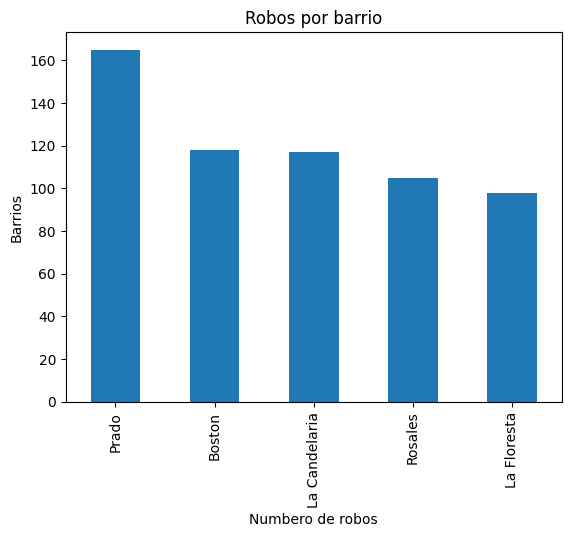

In [ ]:
#graficas
import matplotlib.pyplot as plt

accidente_por_barrio = tbHurtos.groupby("nombre_barrio").size().sort_values(ascending=False).head(5)
#accidente_por_barrio.sort_values(ascending=False)

accidente_por_barrio.plot.bar(5)
# Add labels and title
plt.ylabel("Barrios")
plt.xlabel("Numbero de robos")
plt.title("Robos por barrio")
# Display the chart
plt.show()


In [ ]:
accidente_por_estado_civil = tbHurtos.groupby("estado_civil").size().sort_values(ascending=False).head(5)
accidente_por_estado_civil

,0
estado_civil,
Sin dato,2230
Soltero(a),1675
Casado(a),654
Unión marital de hecho,317
Divorciado(a),35


In [ ]:
accidente_por_barrio_sexo = tbHurtos.groupby(["arma_medio","sexo"]).size().sort_values(ascending=False)
accidente_por_barrio_sexo

<ipython-input-14-a893a9cb33cb>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accidente_por_barrio_sexo = tbHurtos.groupby(["arma_medio","sexo"]).size().sort_values(ascending=False)


arma_medio          sexo    
Arma de fuego       Hombre      1831
Sin dato            Hombre      1788
Arma de fuego       Mujer        337
No                  Hombre       302
Sin dato            Mujer        249
Llave maestra       Hombre       217
                    Mujer         47
No                  Mujer         37
Objeto contundente  Hombre        34
Arma cortopunzante  Hombre        34
Sin dato            Sin dato      15
Arma de fuego       Sin dato      14
Arma cortopunzante  Mujer          9
Objeto contundente  Mujer          4
Escopolamina        Hombre         1
Llave maestra       Sin dato       0
Escopolamina        Sin dato       0
                    Mujer          0
No                  Sin dato       0
Objeto contundente  Sin dato       0
Arma cortopunzante  Sin dato       0
dtype: int64

In [ ]:
accidente_por_barrio_sexo = (tbHurtos.groupby(["sexo"]).size()/tbHurtos.shape[0]*100).sort_values(ascending=False)
accidente_por_barrio_sexo

<ipython-input-15-8df3646217fd>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accidente_por_barrio_sexo = (tbHurtos.groupby(["sexo"]).size()/tbHurtos.shape[0]*100).sort_values(ascending=False)


,0
sexo,
Hombre,84.14
Mujer,13.66
Sin dato,0.58


In [ ]:
promedio_por_sexo = tbHurtos.groupby("sexo").size().agg(['min', 'max'])
promedio_por_sexo

<ipython-input-16-bd73ec87b244>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedio_por_sexo = tbHurtos.groupby("sexo").size().agg(['min', 'max'])


,0
min,29
max,4207


NUEVO DATASET CREADO DESDE LISTAS


In [ ]:
df_llenado = pd.DataFrame([[1,"vaca","gato"],[2,"","res"],[3,"","gato"]], columns=['Animal1', 'Animal2', 'Animal3'])

df_llenado = df_llenado.replace("",None)
df_llenado



,Animal1,Animal2,Animal3
0,1,vaca,gato
1,2,None,res
2,3,None,gato


In [ ]:
pd.isna(df_llenado)
#print(df_llenado["Animal2"].unique())

,Animal1,Animal2,Animal3
0,False,False,False
1,False,True,False
2,False,True,False


In [ ]:
df_llenado.iloc[0][1]

<ipython-input-19-aa763843dfc1>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_llenado.iloc[0][1]


'vaca'

In [ ]:
df_llenado_numerico = pd.DataFrame([[20, 'Luis', 3], [19, 'Eduardo', ''], [18, 'Juan', 2.5], [18, None, 2.5]],
                                   columns = ['Edad', 'Nombre', 'Promedio'],
                                   index = ['Estudiante1', 'Estudiante2', 'Estudiante3','Estudiante4'])
df_llenado_numerico

,Edad,Nombre,Promedio
Estudiante1,20,Luis,3
Estudiante2,19,Eduardo,
Estudiante3,18,Juan,2.5
Estudiante4,18,None,2.5


In [ ]:
df_llenado_numerico[(df_llenado_numerico.Edad<19) & (df_llenado_numerico.Edad>=10)]

,Edad,Nombre,Promedio
Estudiante3,18,Juan,2.5
Estudiante4,18,None,2.5


In [ ]:
df_llenado_numerico.loc["Estudiante1"]



,Estudiante1
Edad,20
Nombre,Luis
Promedio,3


In [ ]:
df_llenado_numerico.iloc[0]

,Estudiante1
Edad,20
Nombre,Luis
Promedio,3


In [ ]:
df_llenado_numerico = df_llenado_numerico.replace("",None)
df_llenado_numerico

,Edad,Nombre,Promedio
Estudiante1,20,Luis,3
Estudiante2,19,Eduardo,None
Estudiante3,18,Juan,2.5
Estudiante4,18,None,2.5


In [ ]:
df_llenado_numerico1=df_llenado_numerico.fillna(0)
df_llenado_numerico1

<ipython-input-25-a59ef0543827>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_llenado_numerico1=df_llenado_numerico.fillna(0)


,Edad,Nombre,Promedio
Estudiante1,20,Luis,3.0
Estudiante2,19,Eduardo,0.0
Estudiante3,18,Juan,2.5
Estudiante4,18,0,2.5


In [ ]:
df_llenado_numerico

,Edad,Nombre,Promedio
Estudiante1,20,Luis,3
Estudiante2,19,Eduardo,None
Estudiante3,18,Juan,2.5
Estudiante4,18,None,2.5


In [ ]:
df_llenado_numerico.Promedio.median()


2.5

In [ ]:
df_llenado_numerico.Promedio.mean()

2.6666666666666665

In [ ]:
df_llenado_numerico2 = df_llenado_numerico.fillna(df_llenado_numerico.Promedio.median())
df_llenado_numerico2

<ipython-input-29-7b4f112d7cb8>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_llenado_numerico2 = df_llenado_numerico.fillna(df_llenado_numerico.Promedio.median())


,Edad,Nombre,Promedio
Estudiante1,20,Luis,3.0
Estudiante2,19,Eduardo,2.5
Estudiante3,18,Juan,2.5
Estudiante4,18,2.5,2.5


In [ ]:
df_llenado_numerico3 = df_llenado_numerico.fillna(df_llenado_numerico.Promedio.mean())
df_llenado_numerico3

<ipython-input-30-891154c47afd>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_llenado_numerico3 = df_llenado_numerico.fillna(df_llenado_numerico.Promedio.mean())


,Edad,Nombre,Promedio
Estudiante1,20,Luis,3.000000
Estudiante2,19,Eduardo,2.666667
Estudiante3,18,Juan,2.500000
Estudiante4,18,2.666667,2.500000


CARGUE Y ANALISIS DE NUEVO DATASET


In [ ]:
tbHurto_a_persona= pd.read_csv('/content/drive/MyDrive/talent_tech/hurto_a_persona.csv')
tbHurto_a_persona.describe()

<ipython-input-31-a50db952b456>:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  tbHurto_a_persona= pd.read_csv('/content/drive/MyDrive/talent_tech/hurto_a_persona.csv')


,cantidad,latitud,longitud,edad,modelo
count,326489.0,284545.000000,284545.000000,326489.000000,326489.000000
mean,1.0,6.246950,-75.572000,34.335126,0.106527
std,0.0,0.037377,0.618576,13.120093,47.092037
min,1.0,3.855871,-76.317445,-1.000000,-1.000000
25%,1.0,6.234175,-75.587787,25.000000,-1.000000
50%,1.0,6.248980,-75.571988,32.000000,-1.000000
75%,1.0,6.259588,-75.565975,42.000000,-1.000000
max,1.0,10.155289,75.607180,121.000000,2023.000000


In [ ]:
tbHurto_a_persona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326489 entries, 0 to 326488
Data columns (total 36 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fecha_hecho          326489 non-null  object 
 1   cantidad             326489 non-null  float64
 2   latitud              284545 non-null  float64
 3   longitud             284545 non-null  float64
 4   sexo                 326489 non-null  object 
 5   edad                 326489 non-null  int64  
 6   estado_civil         326489 non-null  object 
 7   grupo_actor          326489 non-null  object 
 8   actividad_delictiva  326489 non-null  object 
 9   parentesco           326489 non-null  object 
 10  ocupacion            326489 non-null  object 
 11  discapacidad         326489 non-null  object 
 12  grupo_especial       326489 non-null  object 
 13  medio_transporte     326489 non-null  object 
 14  nivel_academico      326489 non-null  object 
 15  testigo          

In [ ]:
tbHurto_a_persona['bien'].unique()

array(['Celular', 'Billetera', 'Elementos escolares', 'Cámara', 'Peso',
       'Cigarrillo', 'Computador', 'Cédula', 'Sin dato electrodomésticos',
       'Accesorios prendas de vestir', 'Licencia', 'Pasacintas', 'Euro',
       'Ropa exterior', 'Radio', 'Tablet', 'Salsa', 'Autopartes',
       'Sellos', 'Taladro', 'Maletín', 'Bicicleta',
       'Electrodomésticos cocina y limpieza hogar', 'Biseles',
       'Morral militar', 'Espejo', 'Factura',
       'Electrodoméstico video y audio y accesorios', 'Llave',
       'Sin dato joyas', 'Papel', 'Zapatos', 'Artículos de aseo personal',
       'Dólar', 'Pistola', 'Gato hidráulico', 'Medicamentos', 'Escritura',
       'Animales domésticos', 'Tarjeta bancaria', 'Módem', 'Encomiendas',
       'Accesorios celular', 'Sin dato documentos', 'Cargadores',
       'Elementos computador', 'Datáfono', 'Decoración del hogar', 'Soat',
       'Dvd', 'Casco moto', 'Ipod', 'Aluminio', 'Reja', 'Revólver',
       'Repuestos para maquinaria y equipo', 'Sin dato me

In [ ]:
tbHurto_a_persona['categoria_bien'].unique()

array(['Tecnología', 'Prendas de vestir y accesorios',
       'Elementos escolares',
       'Dinero, joyas, piedras preciosas y título valor',
       'Artículos de fumador', 'Documentos', 'Electrodomésticos',
       'Alimento', 'Autoparte y elementos de la mecánica automotriz',
       'Otros elementos', 'Herramientas', 'Vehículos de 2 o 4 ruedas',
       'Accesorios militares, policía o vigilancia privada',
       'Librería, Papelería y útiles', 'Accesorios del hogar',
       'Arma de fuego', 'Medicamento', 'Fauna', 'Materia prima',
       'Materiales y elementos para la construcción',
       'Maquinaria y equipo', 'Sin dato mercancías', 'Automóvil',
       'Camionetas', 'Sin dato', 'Otras formas de transporte',
       'Equipamiento servicios públicos', 'Música', 'Vehículo panel',
       'Transporte aire', 'Licor', 'Artículos médicos',
       'Elementos para actividades al aire libre', 'Muebles', 'Químicos',
       'Equipamiento vías y señalización', 'Combustible', 'Flora',
       'Ele

In [ ]:
#sumar los valores nulos de cada columna
tbHurto_a_persona.isnull().sum()

,0
fecha_hecho,0
cantidad,0
latitud,41944
longitud,41944
sexo,0
edad,0
estado_civil,0
grupo_actor,0
actividad_delictiva,0
parentesco,0


In [ ]:
tbHurto_a_persona= tbHurto_a_persona.drop(columns=["ocupacion","nivel_academico","parentesco","discapacidad","grupo_actor",
                                "categoria_penal","grupo_especial","articulo_penal","permiso","testigo",
                                "caracterizacion","actividad_delictiva","unidad_medida"])

In [ ]:
from skimpy import skim

skim(tbHurto_a_persona)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 326489 │ │ string      │ 17    │                                                          │
│ │ Number of columns │ 22     │ │ float64     │ 3     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column   ┃ NA    ┃ NA %            ┃ mean   ┃ sd      ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ cantidad │     0 │               0 │      1 │       0 │      1 │      1 │      1 │      1 │     1 │     █  │  │
│ │ latitud  │ 41944 │ 12.846987187929 │  6.247 │ 0.03738 │  3.856 │  6.234 │  6.249 │   6.26 │ 10.16 │    █   │  │
│ │          │       │             761 │        │         │        │        │        │        │       │        │  │
│ │ longitud │ 41944 │ 12.846987187929 │ -75.57 │  0.6186 │ -76.32 │ -75.59 │ -75.57 │ -75.57 │ 75.61 │   █    │  │
│ │          │       │             761 │        │         │        │        │        │        │       │        │  │
│ │ edad     │     0 │               0 │  34.34 │   13.12 │     -1 │     25 │     32 │     42 │   121 │  ▁█▃▁  │  │
│ │ modelo   │     0 │               0 │ 0.1065 │   47.09 │     -1 │     -1 │     -1 │     -1 │  2023 │   █    │  │
│ └──────────┴───────┴─────────────────┴────────┴─────────┴────────┴────────┴────────┴────────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ fecha_hec │  0 │    0 │ 2017-01-0 │ 2017-01-0 │ 2003-01-0 │ 2023-11-3 │        29 │         1 │     326489 │  │
│ │ ho        │    │      │ 1T01:00:0 │ 1T01:00:0 │ 1T00:30:0 │ 0T23:30:0 │           │           │            │  │
│ │           │    │      │ 0.000-05: │ 0.000-05: │ 0.000-05: │ 0.000-05: │           │           │            │  │
│ │           │    │      │ 00        │ 00        │ 00        │ 00        │           │           │            │  │
│ │ sexo      │  0 │    0 │ Mujer     │ Sin dato  │ Hombre    │ Sin dato  │       5.6 │         1 │     328190 │  │
│ │ estado_ci │  0 │    0 │ Viudo(a)  │ Unión     │ Casado(a) │ Viudo(a)  │      11.3 │       1.5 │     498779 │  │
│ │ vil       │    │      │           │ marital   │           │           │           │           │            │  │
│ │           │    │      │           │ de hecho  │           │           │           │           │            │  │
│ │ medio_tra │  0 │    0 │ Taxi      │ Motocicle │ Auto

In [ ]:
tbHurto_a_persona.shape

(326489, 23)

In [ ]:
df_Barrio = tbHurto_a_persona.groupby("nombre_barrio").size().sort_values(ascending=False)
df_Barrio

,0
nombre_barrio,
La Candelaria,37473
El Poblado,9479
Guayaquil,6945
Barrio Colón,6654
Prado,5799
...,...
Sin dato 15 Guayabal,3
Sin dato 11 Laureles - Estadio,1
La Suiza,1


In [ ]:
tbHurto_a_persona.shape

(326489, 23)

In [ ]:
df_sexo_barrio = tbHurto_a_persona.groupby(["nombre_barrio","sexo"]).size().sort_values(ascending=False)
df_sexo_barrio

nombre_barrio         sexo    
La Candelaria         Hombre      19921
                      Mujer       17416
El Poblado            Hombre       5691
                      Mujer        3685
San Benito            Hombre       3562
                                  ...  
Universidad Nacional  Sin dato        1
La Milagrosa          Sin dato        1
El Jardin             Mujer           1
Barrio Caycedo        Sin dato        1
Girardot              Sin dato        1
Length: 860, dtype: int64

In [ ]:
df_sexo_por_edad = tbHurto_a_persona.groupby(["nombre_barrio","sexo"]).size().sort_values(ascending=False)
df_sexo_por_edad

nombre_barrio         sexo    
La Candelaria         Hombre      19921
                      Mujer       17416
El Poblado            Hombre       5691
                      Mujer        3685
San Benito            Hombre       3562
                                  ...  
Universidad Nacional  Sin dato        1
La Milagrosa          Sin dato        1
El Jardin             Mujer           1
Barrio Caycedo        Sin dato        1
Girardot              Sin dato        1
Length: 860, dtype: int64

In [ ]:
df_sexo_por_edad.std()

1061.5264420245257

In [ ]:
df_sexo_por_edad.mean()

379.63837209302324

In [ ]:
#promedio de edad por barrio
avg_barrio= tbHurto_a_persona.groupby('nombre_barrio')['edad'].mean().sort_values(ascending=False)
avg_barrio

,edad
nombre_barrio,
Barro Blanco,49.666667
Potrera Miserenga,48.666667
Sin dato 15 Guayabal,47.666667
Volcana Guayabal,44.055556
El Astillero,43.642857
...,...
Sin dato 3 Manrique,25.142857
Área de expansión Eduardo Santos,21.000000
La Ilusion,16.000000


In [ ]:
df_sexo_por_edad.std()

1061.5264420245257

In [ ]:
df_sexo_estado = tbHurto_a_persona.groupby(["sexo","estado_civil","nombre_barrio"]).size().sort_values(ascending=False)
df_sexo_estado

sexo    estado_civil            nombre_barrio        
Hombre  Soltero(a)              La Candelaria            10368
Mujer   Soltero(a)              La Candelaria             9406
Hombre  Unión marital de hecho  La Candelaria             3362
        Casado(a)               La Candelaria             3259
        Soltero(a)              El Poblado                3159
                                                         ...  
Mujer   Viudo(a)                Villa Niza                   1
Hombre  Viudo(a)                Moscú No.1                   1
Mujer   Viudo(a)                Villa Guadalupe              1
Hombre  Viudo(a)                Monteclaro                   1
Mujer   Viudo(a)                Francisco Antonio Zea        1
Length: 3671, dtype: int64

In [ ]:
tbHurto_a_persona[tbHurto_a_persona.nombre_barrio=="El Poblado"]

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,medio_transporte,conducta,modalidad,...,codigo_barrio,codigo_comuna,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,fecha_ingestion
183,2017-01-05T11:35:00.000-05:00,1.0,6.209276,-75.570019,Mujer,27,Soltero(a),Caminata,Hurto a persona,Descuido,...,#1418,14,Vía pública,Poblado,Celular,Tecnología,Mercancía,-1,Negro,2024-10-06T04:07:03.000-05:00
277,2017-01-07T12:30:00.000-05:00,1.0,6.209088,-75.566679,Mujer,30,Soltero(a),Caminata,Hurto a persona,Raponazo,...,#1418,14,Vía pública,Poblado,Accesorios prendas de vestir,Prendas de vestir y accesorios,Mercancía,-1,Negro,2024-10-06T04:07:03.000-05:00
295,2017-01-08T02:00:00.000-05:00,1.0,6.209722,-75.569056,Mujer,26,Soltero(a),Caminata,Hurto a persona,Cosquilleo,...,#1418,14,Vía pública,Poblado,Celular,Tecnología,Mercancía,-1,Sin dato,2024-10-06T04:07:03.000-05:00
325,2017-01-09T06:00:00.000-05:00,1.0,6.208683,-75.565638,Hombre,27,Soltero(a),Caminata,Hurto a persona,Atraco,...,#1418,14,Vía pública,Poblado,Celular,Tecnología,Mercancía,-1,Sin dato,2024-10-06T04:07:03.000-05:00
331,2017-01-09T08:15:00.000-05:00,1.0,6.210581,-75.570337,Mujer,26,Soltero(a),Caminata,Hurto a persona,Raponazo,...,#1418,14,Vía pública,Poblado,Maletín,Otros elementos,Mercancía,-1,Negro,2024-10-06T04:07:03.000-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326295,2023-11-25T16:30:00.000-05:00,1.0,NaN,NaN,Mujer,40,Sin dato,Caminata,Hurto a persona,Atraco,...,#1418,14,Centro comercial,Poblado,Sin dato,Sin dato,Sin dato,-1,Sin dato,2024-10-06T04:07:03.000-05:00
326297,2023-11-25T17:00:00.000-05:00,1.0,NaN,NaN,Mujer,52,Sin dato,Caminata,Hurto a persona,Atraco,...,#1418,14,Centro comercial,Manrique,Sin dato,Sin dato,Sin dato,-1,Sin dato,2024-10-06T04:07:03.000-05:00
326331,2023-11-26T19:00:00.000-05:00,1.0,NaN,NaN,Mujer,35,Sin dato,Caminata,Hurto a persona,Cosquilleo,...,#1418,14,Centro comercial,Laureles,Sin dato,Sin dato,Sin dato,-1,Sin dato,2024-10-06T04:07:03.000-05:00
326335,2023-11-27T01:00:00.000-05:00,1.0,NaN,NaN,Hombre,71,Sin dato,Caminata,Hurto a persona,Rompimiento cerradura,...,#1418,14,Bodega,Belén,Sin dato,Sin dato,Sin dato,-1,Sin dato,2024-10-06T04:07:03.000-05:00


IMPUTACION DE DATOS
Relleno de información de vscios sin alterar el promedio.

Un histograma nos ayuda a identificar el rango de datos

si mi desviacion estandar en muy grande, no bastará la media para haer imputación.

Text(0.5, 1.0, 'Histograma de la columna Edad')

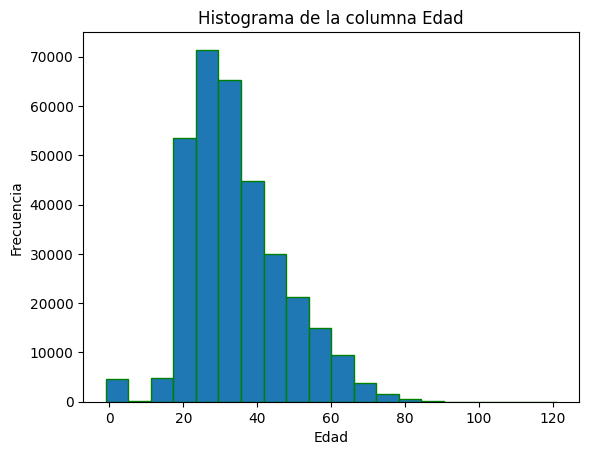

In [ ]:
# histograma de la columna edad del df tbHurto_a_persona

# Create the histogram
plt.hist(tbHurto_a_persona['edad'].dropna(), bins=20, edgecolor='green')  # Adjust bins as needed
# Add labels and title
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de la columna Edad')

# Display the histogram
#plt.show()


(array([4.6010e+03, 3.6000e+01, 2.2000e+01, 2.2000e+01, 8.7000e+01,
        2.8500e+02, 2.3220e+03, 8.3090e+03, 1.6861e+04, 3.0424e+04,
        2.3848e+04, 3.6247e+04, 2.3165e+04, 3.1334e+04, 2.2103e+04,
        2.4187e+04, 1.4141e+04, 1.2495e+04, 1.5336e+04, 8.5430e+03,
        1.1395e+04, 6.7440e+03, 8.9130e+03, 5.0550e+03, 4.1250e+03,
        5.0540e+03, 2.4550e+03, 2.8040e+03, 1.4550e+03, 1.6240e+03,
        7.5600e+02, 6.9000e+02, 3.7900e+02, 2.1700e+02, 2.3200e+02,
        9.9000e+01, 6.9000e+01, 2.7000e+01, 1.7000e+01, 8.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([ -1.  ,   1.44,   3.88,   6.32,   8.76,  11.2 ,  13.64,  16.08,
         18.52,  20.96,  23.4 ,  25.84,  28.28,  30.72,  33.16,  35.6 ,
         38.04,  40.48,  42.92,  45.36,  47.8 ,  50.24,  52.68,  55.12,
         57.56,  60.  ,  62.44,  64.88,  67.32,  69.76,  72.2 ,  74.64,
         77.08,  79.52,  81.96

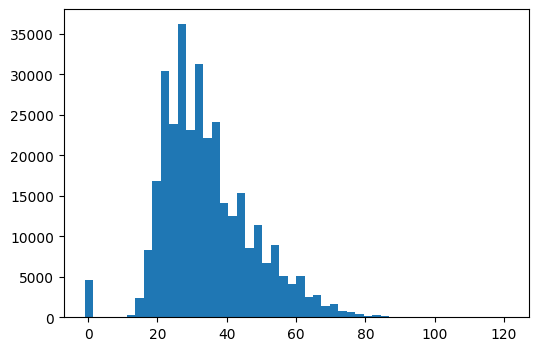

In [ ]:
plt.figure(figsize=[6,4]) #configura el tamaño del grafico
plt.hist(tbHurto_a_persona['edad'], bins=50)

In [ ]:
!pip install miceforest
# es un argoritmo para rellenar los datos vacios de mis datos vacios en la base de datos

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.6 MB/s eta 0:00:00


In [ ]:
import miceforest as mf
from sklearn.datasets import load_iris #extrae el dataset iris
from sklearn import datasets
#import numpy as np

In [ ]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names) # convertir iris a df to DataFrame

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
iris_df['target']= iris.target
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [ ]:
iris_df.rename({"target":"species"}, inplace=True, axis=1)
#iris_df['nombre'] = iris.target_names
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
iris_df['species'] = iris_df['species'].astype('category')
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [ ]:
#aisgno valores nulos aleatoriamente
iris_amp = mf.ampute_data(iris_df, perc=0.25, random_state=2000)
iris_amp

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,NaN,3.5,1.4,NaN,0
1,4.9,3.0,1.4,NaN,NaN
2,4.7,3.2,1.3,0.2,0
3,NaN,NaN,1.5,NaN,0
4,5.0,NaN,1.4,0.2,NaN
...,...,...,...,...,...
145,6.7,NaN,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,NaN,5.2,2.0,NaN
148,6.2,3.4,5.4,NaN,2


In [ ]:
#correr el algoritmo MICE durante 2 iteraciones
kds = mf.ImputationKernel(
    iris_amp,
    random_state=2000
  )

kds.mice(2)

#retorna el dataset completo
iris_completo = kds.complete_data()

In [ ]:
iris_completo

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.3,3.5,1.4,0.4,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,5.1,3.5,1.5,0.3,0
4,5.0,3.2,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.3,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,2.8,5.2,2.0,2
148,6.2,3.4,5.4,2.4,2


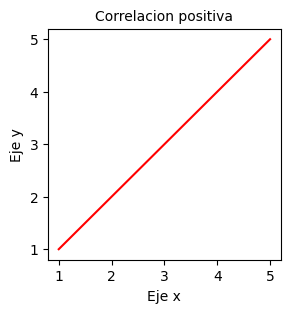

In [ ]:
#import matplotlib as plt

x = [1,2,3,4,5]
y = [1,2,3,4,5]

plt.figure(figsize=[3,3])
plt.plot(x,y, color ='red')
plt.title('Correlacion positiva', fontsize =10)
plt.xlabel('Eje x', fontsize =10)
plt.ylabel('Eje y', fontsize =10)
plt.show()

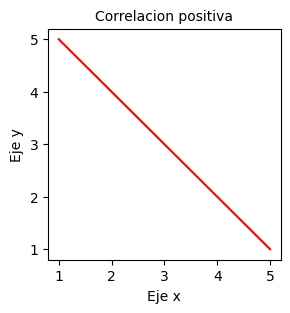

In [ ]:
x = [1,2,3,4,5]
y = [5,4,3,2,1]

plt.figure(figsize=[3,3])
plt.plot(x,y, color ='red')
plt.title('Correlacion positiva', fontsize =10)
plt.xlabel('Eje x', fontsize =10)
plt.ylabel('Eje y', fontsize =10)
plt.show()

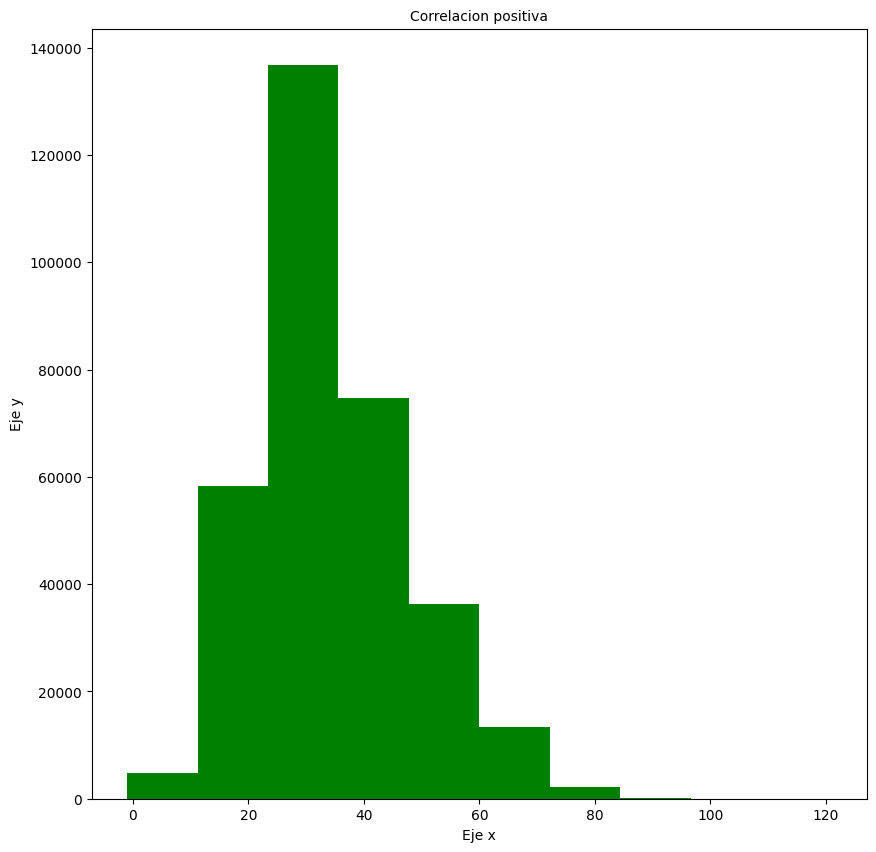

In [ ]:
x = [1,2,3,4,5]
y = [5,4,3,2,1]

plt.figure(figsize=[10,10])
plt.hist(tbHurto_a_persona['edad'], color ='green')
plt.title('Correlacion positiva', fontsize =10)
plt.xlabel('Eje x', fontsize =10)
plt.ylabel('Eje y', fontsize =10)
plt.show()

SERIES DE TIEMPO


In [ ]:
# tranformacion de fecha de hecho
df_fecha = pd.Series(tbHurtos['fecha_hecho'])
df_fecha

,fecha_hecho
0,2017-01-01T23:00:00.000-05:00
1,2017-01-01T20:30:00.000-05:00
2,2017-01-01T07:00:00.000-05:00
3,2017-01-01T09:00:00.000-05:00
4,2017-01-01T16:30:00.000-05:00
...,...
4995,2017-02-07T20:00:00.000-05:00
4996,2017-02-08T21:00:00.000-05:00
4997,2017-02-08T06:30:00.000-05:00
4998,2017-02-08T14:40:00.000-05:00


In [ ]:
print(type(df_fecha))

<class 'pandas.core.series.Series'>


In [ ]:
df_fecha = df_fecha.str.split("T")
df_fecha

,fecha_hecho
0,"[2017-01-01, 23:00:00.000-05:00]"
1,"[2017-01-01, 20:30:00.000-05:00]"
2,"[2017-01-01, 07:00:00.000-05:00]"
3,"[2017-01-01, 09:00:00.000-05:00]"
4,"[2017-01-01, 16:30:00.000-05:00]"
...,...
4995,"[2017-02-07, 20:00:00.000-05:00]"
4996,"[2017-02-08, 21:00:00.000-05:00]"
4997,"[2017-02-08, 06:30:00.000-05:00]"
4998,"[2017-02-08, 14:40:00.000-05:00]"


In [ ]:
df_fecha = pd.DataFrame(df_fecha)

In [ ]:
df_fecha = pd.DataFrame(df_fecha.fecha_hecho.values.tolist(), index = df_fecha.index)
df_fecha = df_fecha.rename(columns={0:'Fecha',1:'Hora'})
df_fecha

,Fecha,Hora,2,3,4
0,2017-01-01,23:00:00.000-05:00,None,None,None
1,2017-01-01,20:30:00.000-05:00,None,None,None
2,2017-01-01,07:00:00.000-05:00,None,None,None
3,2017-01-01,09:00:00.000-05:00,None,None,None
4,2017-01-01,16:30:00.000-05:00,None,None,None
...,...,...,...,...,...
4995,2017-02-07,20:00:00.000-05:00,None,None,None
4996,2017-02-08,21:00:00.000-05:00,None,None,None
4997,2017-02-08,06:30:00.000-05:00,None,None,None
4998,2017-02-08,14:40:00.000-05:00,None,None,None


In [ ]:
df_fecha_datetime = pd.to_datetime(df_fecha["Fecha"], format="%Y-%m-%d")
print(df_fecha_datetime.head())

print("------Fecha minima--------")

print(df_fecha_datetime.min())

print("-------Fecha maxima-------")

print(df_fecha_datetime.max())


0   2017-01-01
1   2017-01-01
2   2017-01-01
3   2017-01-01
4   2017-01-01
Name: Fecha, dtype: datetime64[ns]
------Fecha minima--------
2003-01-01 00:00:00
-------Fecha maxima-------
2017-02-08 00:00:00


In [ ]:
#Identifico el mes de cada registro

df_fecha_datetime_mes=df_fecha_datetime.dt.month
df_fecha_datetime_mes



,Fecha
0,1
1,1
2,1
3,1
4,1
...,...
4995,2
4996,2
4997,2
4998,2


In [ ]:


#identificar días de la semana
df_fecha_datetime_dia=df_fecha_datetime.dt.day_of_week
df_fecha_datetime_dia



,Fecha
0,6
1,6
2,6
3,6
4,6
...,...
4995,1
4996,2
4997,2
4998,2


In [ ]:



#identificar años
df_fecha_datetime_año=df_fecha_datetime.dt.year
df_fecha_datetime_año




,Fecha
0,2017
1,2017
2,2017
3,2017
4,2017
...,...
4995,2017
4996,2017
4997,2017
4998,2017


In [ ]:


df_fecha_datetime_dia=pd.DataFrame(df_fecha_datetime_dia) # Lo convierto a DataFrame





(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(-1.0, 0, '−1'),
  Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7')])

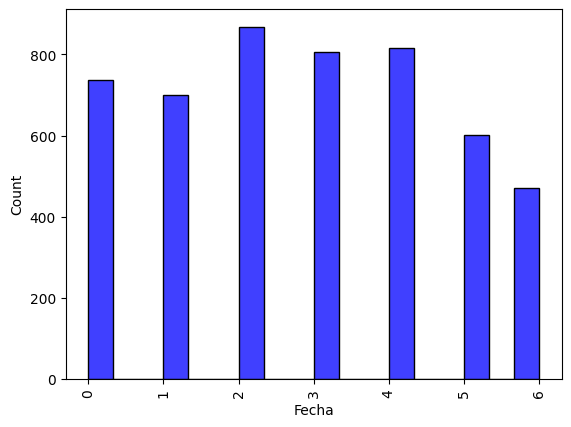

In [ ]:
#Realizo un histograma sobre los días utilizando las siguientes librerias.

import seaborn as sns  #Libreria para crear graficos estadisticos
import matplotlib.pyplot as plt #Libreria para crear graficos general.

sns.histplot(data=df_fecha_datetime_dia, x='Fecha', stat='count', color="blue") #Para que nos cuente la cantidad de registros que tiene cada uno
plt.xticks(rotation=90)


(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12'),
  Text(14.0, 0, '14')])

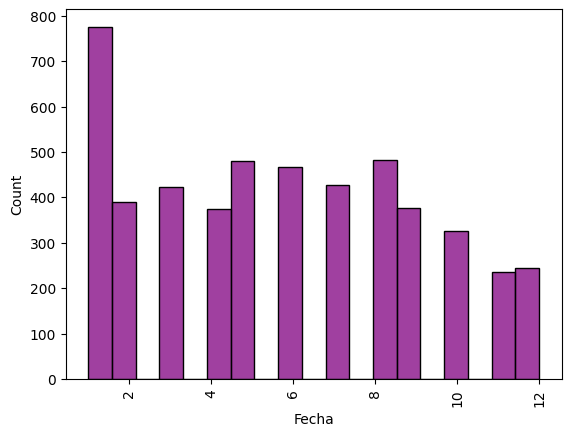

In [ ]:

df_fecha_datetime_mes=pd.DataFrame(df_fecha_datetime_mes) # Lo convierto a DataFrame


#Realizo un histograma sobre los meses.

import seaborn as sns  #Libreria para crear graficos estadisticos
import matplotlib.pyplot as plt #Libreria para crear graficos general.

sns.histplot(df_fecha_datetime_mes, x='Fecha', stat='count', color="purple") #Para que nos cuente la cantidad de registros que tiene cada uno
plt.xticks(rotation=90)






(array([2002., 2004., 2006., 2008., 2010., 2012., 2014., 2016., 2018.]),
 [Text(2002.0, 0, '2002'),
  Text(2004.0, 0, '2004'),
  Text(2006.0, 0, '2006'),
  Text(2008.0, 0, '2008'),
  Text(2010.0, 0, '2010'),
  Text(2012.0, 0, '2012'),
  Text(2014.0, 0, '2014'),
  Text(2016.0, 0, '2016'),
  Text(2018.0, 0, '2018')])

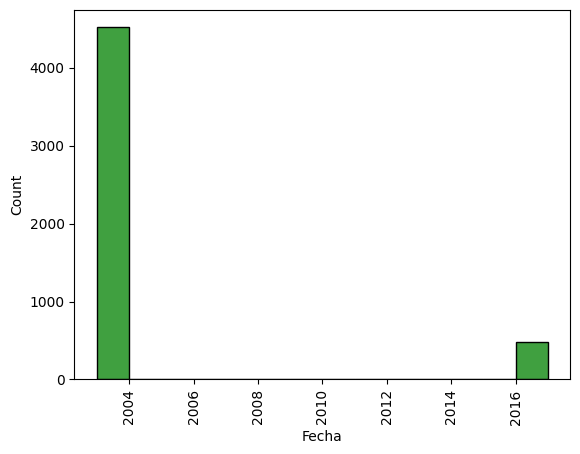

In [ ]:
df_fecha_datetime_año=pd.DataFrame(df_fecha_datetime_año) # Lo convierto a DataFrame


#Realizo un histograma sobre los año.- el histograma me dice cuantas veces está un registro

import seaborn as sns  #Libreria para crear graficos estadisticos
import matplotlib.pyplot as plt #Libreria para crear graficos general.

sns.histplot(df_fecha_datetime_año, x='Fecha', stat='count', color="green") #Para que nos cuente la cantidad de registros que tiene cada uno
plt.xticks(rotation=90)

CALCULAR AUTOCORRELACION DE LA SERIE DE TIEMPO

In [ ]:
df_fecha_agr = df_fecha.groupby("Fecha").size()
df_fecha_agr

,0
Fecha,
2003-01-01,10
2003-01-02,6
2003-01-03,8
2003-01-04,10
2003-01-05,6
...,...
2017-02-04,10
2017-02-05,11
2017-02-06,11


<Figure size 1200x600 with 0 Axes>

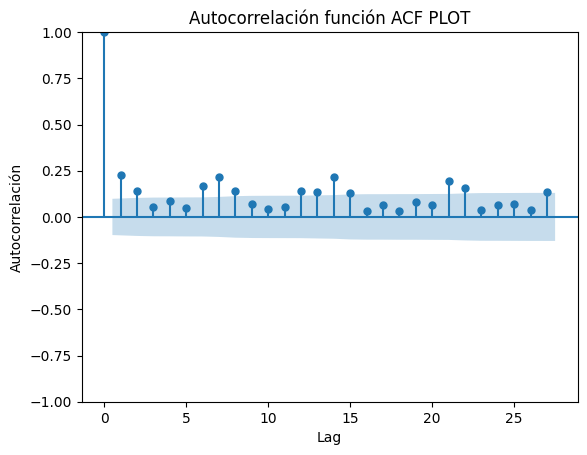

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12,6))
plot_acf(df_fecha_agr)
plt.xlabel('Lag')
plt.ylabel('Autocorrelación')
plt.title('Autocorrelación función ACF PLOT')
plt.show()

LIMPIEZA DE NOMBRES DE BARRIO

In [ ]:
tbHurtos.nombre_barrio = tbHurtos.nombre_barrio.str.lower()

tbHurtos.nombre_barrio = tbHurtos.nombre_barrio.str.strip()

In [ ]:
barrios = tbHurtos['nombre_barrio'].unique()
barrios

array(['el pomar', 'la rosa', 'la isla', 'guayaquil',
       'manrique central no.1', 'campo amor', 'pajarito',
       'trece de noviembre', 'aranjuez', 'san benito', 'estadio',
       'doce de octubre no.1', 'estación villa', 'caribe', 'moscú no.1',
       'san pablo', 'la cruz', 'tejelo', 'las acacias', nan,
       'nueva villa del aburrá', 'miraflores', 'loreto', 'san diego',
       'corazón de jesús', 'andalucía', 'aures no.2', 'prado',
       'área urbana cgto. san antonio de prado', 'rosales',
       'campo valdés no.1', 'el chagualo', 'el danubio', 'miranda',
       'antonio nariño', 'el salvador', 'los ángeles', 'barrio colón',
       'área de expansión pajarito', 'trinidad', 'la mota', 'monteclaro',
       'villa carlota', 'bomboná no.2', 'las palmas', 'progreso',
       'cristo rey', 'bosques de san pablo', 'los conquistadores',
       'el diamante', 'villa nueva', 'área urbana cgto. san cristóbal',
       'castilla', 'el socorro', 'boyacá', 'santa fé', 'san joaquín',
       

In [ ]:
!pip install fuzzywuzzy

In [ ]:
import fuzzywuzzy
from fuzzywuzzy import process
import charset_normalizer

/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
matches = fuzzywuzzy.process.extract("Sin dato", barrios, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches

[('sin dato', 100),
 ('san pablo', 59),
 ('san diego', 59),
 ('san pedro', 59),
 ('la mansión', 59),
 ('san benito', 56),
 ('san isidro', 56),
 ('eduardo santos', 55),
 ('toscana', 53),
 ('simón bolívar', 53)]

In [ ]:
# Create a new column if it doesn't exist
if 'valor_prueba' not in tbHurtos.columns:
    tbHurtos['valor_prueba'] = ''  # Initialize the column with empty strings

# Iterate and add 'prueba' for each barrio
for barrio in barrios:
    tbHurtos.loc[tbHurtos['nombre_barrio'] == barrio, 'valor_prueba'] = str(fuzzywuzzy.process.extract(str(barrio), barrios, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio))

# Display the updated dataframe (optional)
tbHurtos


,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha_ingestion,valor_prueba
0,2017-01-01T23:00:00.000-05:00,1.0,6.268040,-75.549892,Hombre,29,Soltero(a),Sin dato,Sin dato,Sin dato,...,Manrique,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2014.0,Azul,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00,"[('el pomar', 100), ('el poblado', 67), ('el p..."
1,2017-01-01T20:30:00.000-05:00,1.0,6.290076,-75.556893,Hombre,22,Unión marital de hecho,Sin dato,Sin dato,Sin dato,...,Santa Cruz,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2005.0,Rojo,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00,"[('la rosa', 100), ('la milagrosa', 74), ('la ..."
2,2017-01-01T07:00:00.000-05:00,1.0,6.304187,-75.551760,Hombre,23,Unión marital de hecho,Sin dato,Sin dato,Sin dato,...,Santa Cruz,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2011.0,Verde,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00,"[('la isla', 100), ('las brisas', 71), ('la pa..."
3,2017-01-01T09:00:00.000-05:00,1.0,6.248002,-75.574849,Hombre,-1,Sin dato,Sin dato,Sin dato,Sin dato,...,Candelaria,Moto,Vehículos de 2 o 4 ruedas,Vehículo,-1.0,Negro,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00,"[('guayaquil', 100), ('guayabal', 71), ('villa..."
4,2017-01-01T16:30:00.000-05:00,1.0,6.268129,-75.557882,Hombre,34,Soltero(a),Sin dato,Sin dato,Sin dato,...,Aranjuez,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2015.0,Negro,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00,"[('manrique central no.1', 100), ('manrique ce..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2017-02-07T20:00:00.000-05:00,1.0,6.250953,-75.558911,Hombre,25,Unión marital de hecho,Sin dato,Sin dato,Sin dato,...,Candelaria,Moto,Vehículos de 2 o 4 ruedas,Vehículo,-1.0,Rojo,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00,"[('boston', 100), ('boqueron', 57), ('san pabl..."
4996,2017-02-08T21:00:00.000-05:00,1.0,6.234414,-75.610072,Hombre,23,Soltero(a),Sin dato,Sin dato,Sin dato,...,Belén,Moto,Vehículos de 2 o 4 ruedas,Vehículo,-1.0,Blanco,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00,"[('las mercedes', 100), ('los ángeles', 55), (..."
4997,2017-02-08T06:30:00.000-05:00,1.0,6.244410,-75.543281,Hombre,32,Unión marital de hecho,Sin dato,Sin dato,Sin dato,...,Villa Hermosa,Moto,Vehículos de 2 o 4 ruedas,Vehículo,2010.0,Negro,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00,"[('el pinal', 100), ('el raizal', 71), ('el po..."
4998,2017-02-08T14:40:00.000-05:00,1.0,6.237070,-75.572105,Hombre,31,Soltero(a),Sin dato,Sin dato,Sin dato,...,Candelaria,Moto,Vehículos de 2 o 4 ruedas,Vehículo,-1.0,Negro,Sin dato,Sin dato,2024-10-06T04:04:55.000-05:00,"[('perpetuo socorro', 100), ('el socorro', 69)..."


In [ ]:
barrios_df = pd.DataFrame({'barrio': barrios})

if 'columna_de_coincidencia' not in barrios_df.columns:
    barrios_df['columna_de_coincidencia'] = ''  # Initialize the column with empty strings

# Iterate and add 'prueba' for each barrio
for barrio in barrios:
    # Get the fuzzy matches for the current barrio
    matches = fuzzywuzzy.process.extract(str(barrio), barrios, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # Update 'new_column' in barrios_df with the matches
    barrios_df.loc[barrios_df['barrio'] == barrio, 'columna_de_coincidencia'] = str(matches)

# Display the updated dataframe (optional)
print(barrios_df)
print(len(barrios_df))

                       barrio  \
0                    el pomar   
1                     la rosa   
2                     la isla   
3                   guayaquil   
4       manrique central no.1   
..                        ...   
234  santo domingo savio no.1   
235          el diamante no.2   
236                el carmelo   
237                el pesebre   
238            versalles no.2   

                               columna_de_coincidencia  
0    [('el pomar', 100), ('el poblado', 67), ('el p...  
1    [('la rosa', 100), ('la milagrosa', 74), ('la ...  
2    [('la isla', 100), ('las brisas', 71), ('la pa...  
3    [('guayaquil', 100), ('guayabal', 71), ('villa...  
4    [('manrique central no.1', 100), ('manrique ce...  
..                                                 ...  
234  [('santo domingo savio no.1', 100), ('san javi...  
235  [('el diamante no.2', 100), ('el diamante', 81...  
236  [('el carmelo', 100), ('el chagualo', 67), ('e...  
237  [('el pesebre', 100), ('el t

In [ ]:


for index, row in barrios_df.iterrows():
    try:
        coincidencias = eval(row['columna_de_coincidencia'])  # Convert string representation of list to list
        for coincidencia in coincidencias:
            # Process each coincidence (e.g., print it, use it for further operations)
            print(f"Barrio: {row['barrio']}, Coincidencia: {coincidencia}")
    except (NameError, SyntaxError, TypeError):
        print(f"Error processing row {index}: Invalid 'columna_de_coincidencia' value.")
        # Handle the error appropriately, e.g., skip the row, log the error, etc.

Barrio: el pomar, Coincidencia: ('el pomar', 100)
Barrio: el pomar, Coincidencia: ('el poblado', 67)
Barrio: el pomar, Coincidencia: ('el pinal', 62)
Barrio: el pomar, Coincidencia: ('la palma', 62)
Barrio: el pomar, Coincidencia: ('el tesoro', 59)
Barrio: el pomar, Coincidencia: ('las palmas', 56)
Barrio: el pomar, Coincidencia: ('el socorro', 56)
Barrio: el pomar, Coincidencia: ('la pradera', 56)
Barrio: el pomar, Coincidencia: ('el pesebre', 56)
Barrio: el pomar, Coincidencia: ('la rosa', 53)
Barrio: la rosa, Coincidencia: ('la rosa', 100)
Barrio: la rosa, Coincidencia: ('la milagrosa', 74)
Barrio: la rosa, Coincidencia: ('la mota', 71)
Barrio: la rosa, Coincidencia: ('la salle', 67)
Barrio: la rosa, Coincidencia: ('la ladera', 62)
Barrio: la rosa, Coincidencia: ('la pradera', 59)
Barrio: la rosa, Coincidencia: ('santa lucía', 59)
Barrio: la rosa, Coincidencia: ('la isla', 57)
Barrio: la rosa, Coincidencia: ('rosales', 57)
Barrio: la rosa, Coincidencia: ('la pilarica', 56)
Barrio: l

In [ ]:
for index, row in barrios_df.iterrows():
    coincidencias = eval(row['columna_de_coincidencia'])  # Convert string representation of list to list
    for coincidencia_tupla in coincidencias:
        # Check the length of the tuple before unpacking
        if len(coincidencia_tupla) == 3:  # If it's the expected format with 3 elements
            barrio, puntaje, indice = coincidencia_tupla  # Desempaqueto la tupla
            print(f"Barrio: {row['barrio']}, Coincidencia: {barrio}, Puntaje: {puntaje}, Indice: {indice}")
        elif len(coincidencia_tupla) == 2:  # If it has only 2 elements
            barrio, puntaje = coincidencia_tupla  # Unpack into 2 variables
            print(f"Barrio: {row['barrio']}, Coincidencia: {barrio}, Puntaje: {puntaje}, Indice: N/A")  # Print without index
        else:
            print(f"Unexpected format for coincidencia_tupla: {coincidencia_tupla}")  # Handle unexpected cases


Barrio: el pomar, Coincidencia: el pomar, Puntaje: 100, Indice: N/A
Barrio: el pomar, Coincidencia: el poblado, Puntaje: 67, Indice: N/A
Barrio: el pomar, Coincidencia: el pinal, Puntaje: 62, Indice: N/A
Barrio: el pomar, Coincidencia: la palma, Puntaje: 62, Indice: N/A
Barrio: el pomar, Coincidencia: el tesoro, Puntaje: 59, Indice: N/A
Barrio: el pomar, Coincidencia: las palmas, Puntaje: 56, Indice: N/A
Barrio: el pomar, Coincidencia: el socorro, Puntaje: 56, Indice: N/A
Barrio: el pomar, Coincidencia: la pradera, Puntaje: 56, Indice: N/A
Barrio: el pomar, Coincidencia: el pesebre, Puntaje: 56, Indice: N/A
Barrio: el pomar, Coincidencia: la rosa, Puntaje: 53, Indice: N/A
Barrio: la rosa, Coincidencia: la rosa, Puntaje: 100, Indice: N/A
Barrio: la rosa, Coincidencia: la milagrosa, Puntaje: 74, Indice: N/A
Barrio: la rosa, Coincidencia: la mota, Puntaje: 71, Indice: N/A
Barrio: la rosa, Coincidencia: la salle, Puntaje: 67, Indice: N/A
Barrio: la rosa, Coincidencia: la ladera, Puntaje: 6

SyntaxError: invalid syntax (<string>, line 0)

In [ ]:
barrios_df = barrios_df.head(10)
barrios_df

print(len(barrios_df))

10


In [ ]:
for index, row in barrios_df.iterrows():
    coincidencias = eval(row['columna_de_coincidencia'])  # Convert string representation of list to list
    for coincidencia in coincidencias:
        # Process each coincidence (e.g., print it, use it for further operations)
        print(f"Barrio: {row['barrio']}, Coincidencia: {coincidencia}")
        tbHurtos.replace(row['barrio'],coincidencia, inplace)


Barrio: el pomar, Coincidencia: ('el pomar', 100)


NameError: name 'inplace' is not defined

In [ ]:

for index, row in barrios_df.iterrows():
    coincidencias = eval(row['columna_de_coincidencia'])  # Convert string representation of list to list
    for coincidencia_tupla in coincidencias:
        # Check the length of the tuple before unpacking
        if len(coincidencia_tupla) == 3:  # If it's the expected format with 3 elements
          barrio, puntaje, indice = coincidencia_tupla  # Desempaqueto la tupla
          if value(puntaje) >50:
            tbHurtos.replace(row['barrio'],barrio,inplace=True)

tbHurtos


In [ ]:
print(len(barrios))

239


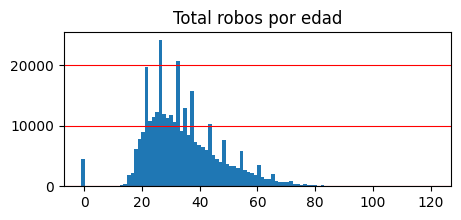

In [ ]:
plt.figure(figsize=(5,2))
plt.hist(tbHurto_a_persona['edad'], bins = 100)
plt.title('Total robos por edad')
plt.grid(axis='y', visible=True, color ='red')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Autobus'),
  Text(1, 0, 'Automóvil'),
  Text(2, 0, 'Bicicleta'),
  Text(3, 0, 'Caminata'),
  Text(4, 0, 'Metro'),
  Text(5, 0, 'Motocicleta'),
  Text(6, 0, 'Motocicleta con parrillero'),
  Text(7, 0, 'Planeador'),
  Text(8, 0, 'Sin dato'),
  Text(9, 0, 'Taxi')])

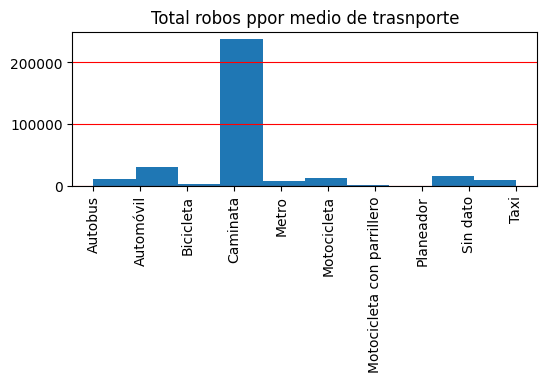

In [ ]:
plt.figure(figsize=(6,2))
plt.hist(tbHurto_a_persona['medio_transporte'].sort_values(ascending=True))
plt.title('Total robos ppor medio de trasnporte')
plt.grid(axis='y', visible=True, color ='red')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Caminata'),
  Text(1, 0, 'Automóvil'),
  Text(2, 0, 'Sin dato'),
  Text(3, 0, 'Motocicleta'),
  Text(4, 0, 'Autobus'),
  Text(5, 0, 'Taxi'),
  Text(6, 0, 'Metro'),
  Text(7, 0, 'Bicicleta'),
  Text(8, 0, 'Motocicleta con parrillero'),
  Text(9, 0, 'Planeador')])

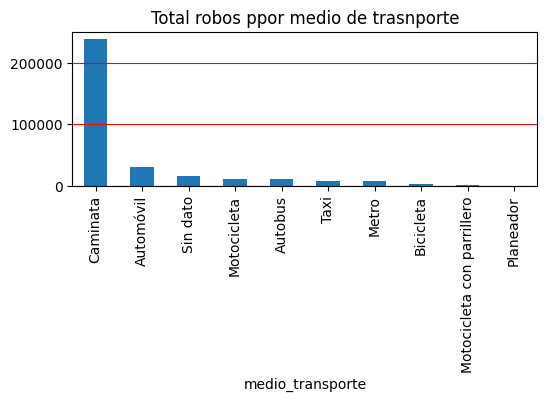

In [ ]:
plt.figure(figsize=(6,2))
tbHurto_a_persona.groupby('medio_transporte').size().sort_values(ascending=False).plot(kind='bar')
#plt.plot(tbHurto_a_persona.groupby('medio_transporte').size())
plt.title('Total robos ppor medio de trasnporte')
plt.grid(axis='y', visible=True, color ='red')
plt.xticks(rotation=90)

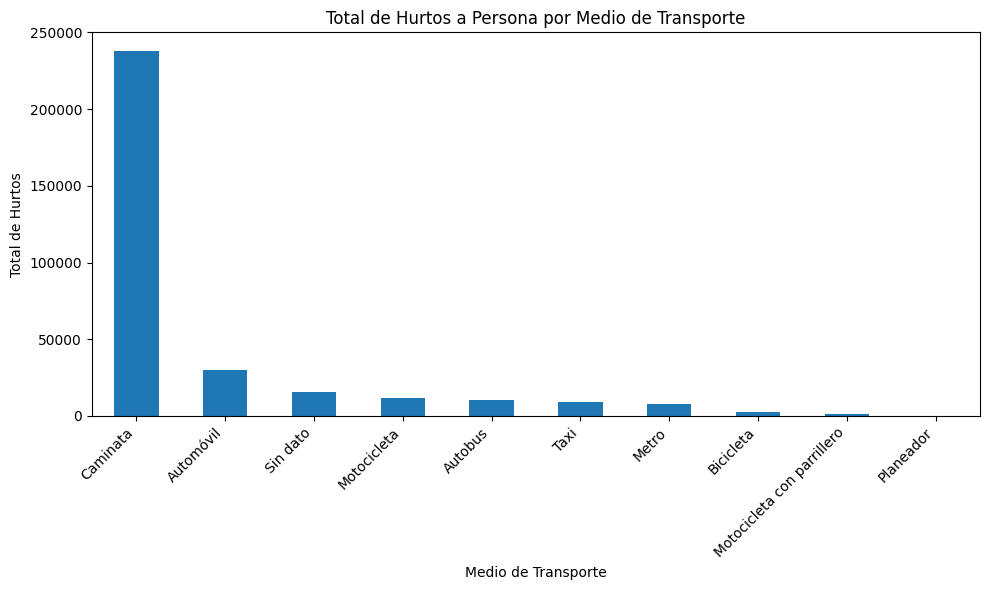

In [ ]:

transporte_hurtos = tbHurto_a_persona.groupby('medio_transporte').size().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
transporte_hurtos.plot(kind='bar')
plt.title('Total de Hurtos a Persona por Medio de Transporte')
plt.xlabel('Medio de Transporte')
plt.ylabel('Total de Hurtos')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

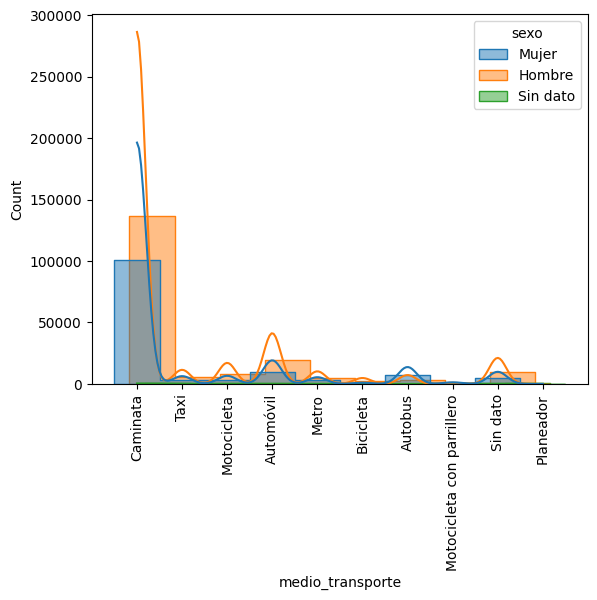

In [ ]:
import seaborn as sns

sns.histplot(data=tbHurto_a_persona, # indico el dataframe
             x="medio_transporte", # indico el dato del eje x
             hue='sexo', # categorias que visualizo
             kde =True, #linea de tendencia
             multiple ='dodge',
             element = "step") # aplicar categorias {“layer”, “dodge”, “stack”, “fill”}
plt.xticks(rotation=90)
plt.show()

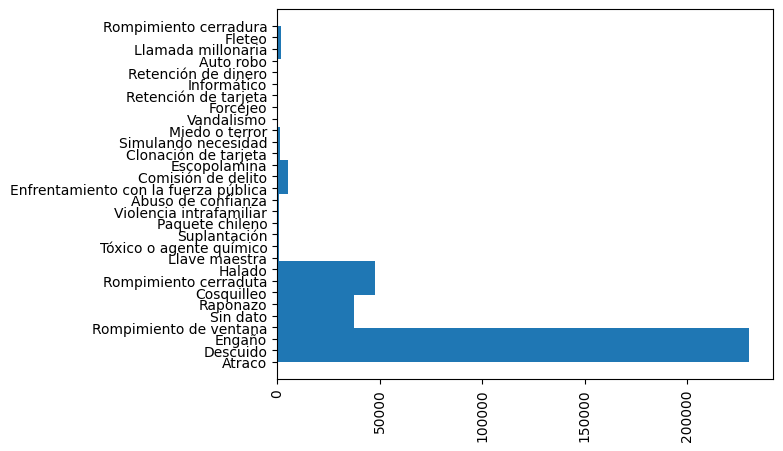

In [ ]:
plt.hist(tbHurto_a_persona["modalidad"], orientation='horizontal')
plt.xticks(rotation=90)
plt.show()

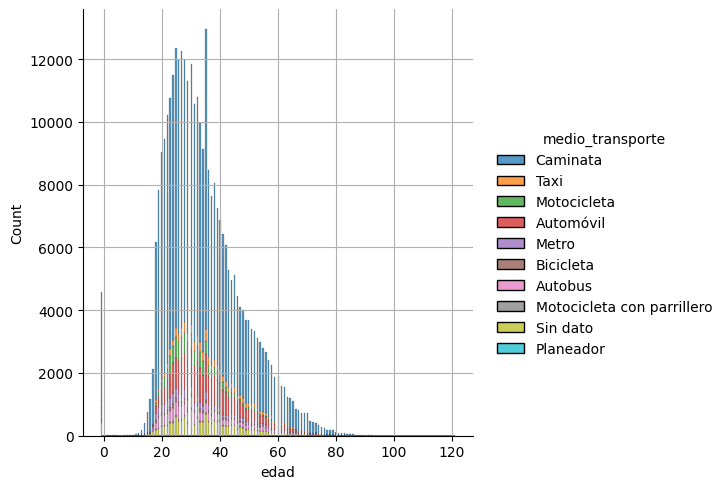

In [ ]:
sns.displot(
    tbHurto_a_persona,
    x='edad',
    hue='medio_transporte',
    multiple= 'stack',

)
plt.grid(True)

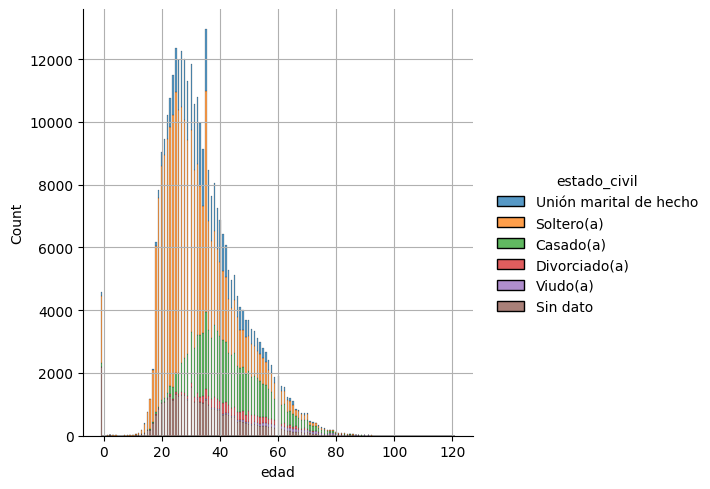

In [ ]:
sns.displot(
    tbHurto_a_persona,
    x='edad',
    hue='estado_civil',
    multiple= 'stack'
)
plt.grid(True)
plt.savefig("hist_edad_Estado.svg")


<ipython-input-104-d4e503565df4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


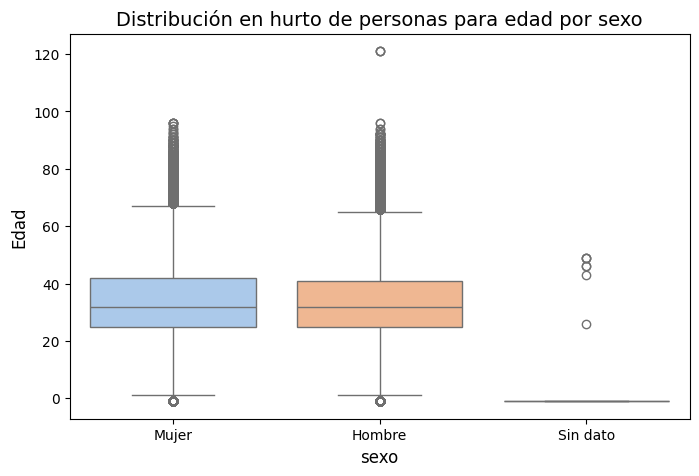

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x=tbHurto_a_persona['sexo'], # tomo un campo categorico
    y=tbHurto_a_persona['edad'], #tomo una variable numerica
    palette='pastel')
plt.title(
    "Distribución en hurto de personas para edad por sexo",
    fontsize=14
)
plt.xlabel('sexo',
           fontsize=12)
plt.ylabel('Edad',
           fontsize=12)
#plt.xticks(rotation=90)
plt.show()


In [ ]:
custom_palette = sns.color_palette(["#FF5733", "#000000", "#3366FF", "#FF33CC"])
#custom_cmap = plt.cm.get_cmap('viridis')
#custom_palette = sns.color_palette("rocket")
# Set the custom palette for seaborn
sns.set_palette(custom_palette)
sns.set(style='ticks',palette=custom_palette, font='sans-serif')

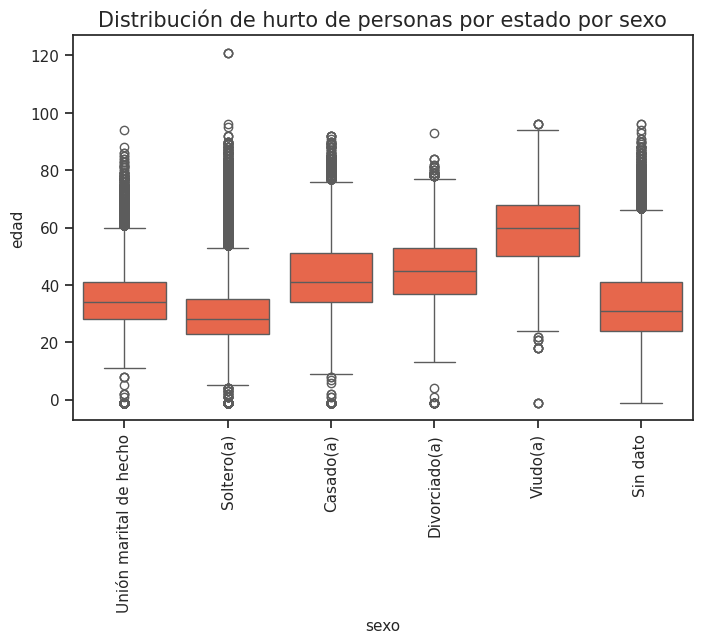

In [ ]:
plt.figure(figsize = (8,5))
sns.boxplot(
    x=tbHurto_a_persona['estado_civil'],
    y=tbHurto_a_persona['edad'])
plt.title('Distribución de hurto de personas por estado por sexo',
          fontsize = 15)
plt.xlabel('sexo', fontsize = 11)
plt.ylabel('edad', fontsize = 11)
plt.xticks(rotation = 90)
plt.savefig("boxplot_edad_sexo.svg")
plt.show()


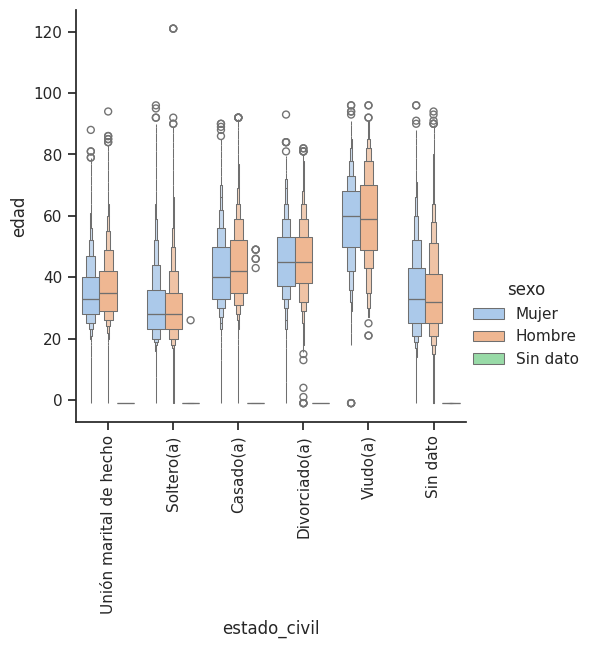

In [149]:
#grafico sin apilar columnas

sns.set(style='ticks',palette="hls", font='sans-serif')
sns.catplot(
    data=tbHurto_a_persona,
    x="estado_civil",
    y="edad",
    hue="sexo",
    kind="boxen" # “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count”
)
plt.xticks(rotation=90)
plt.show()

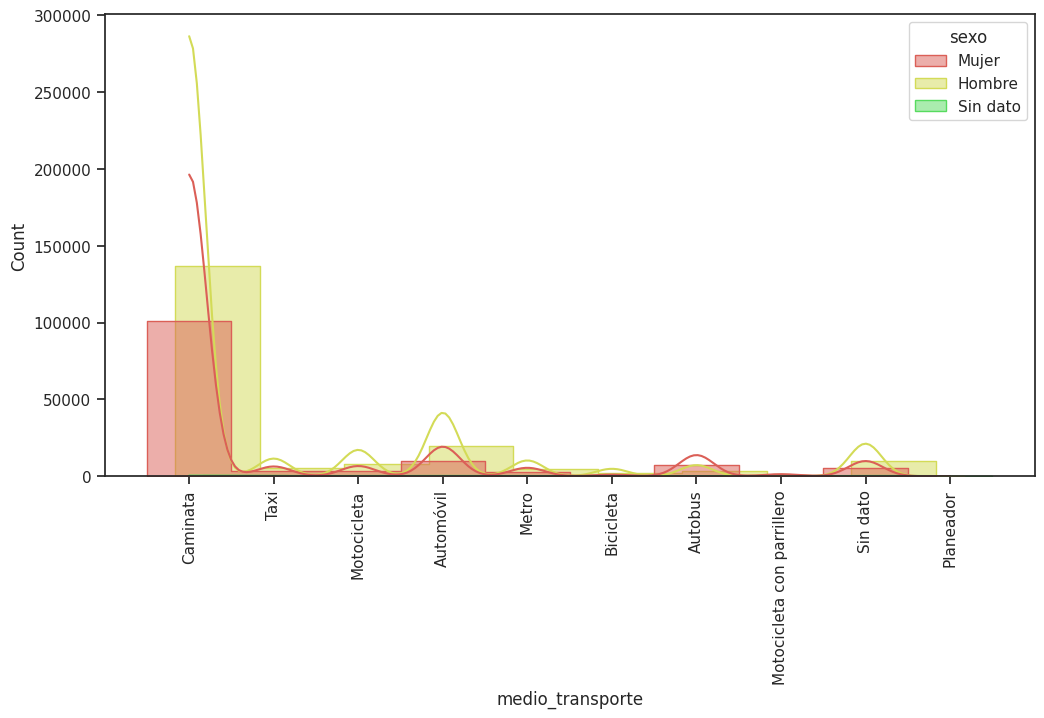

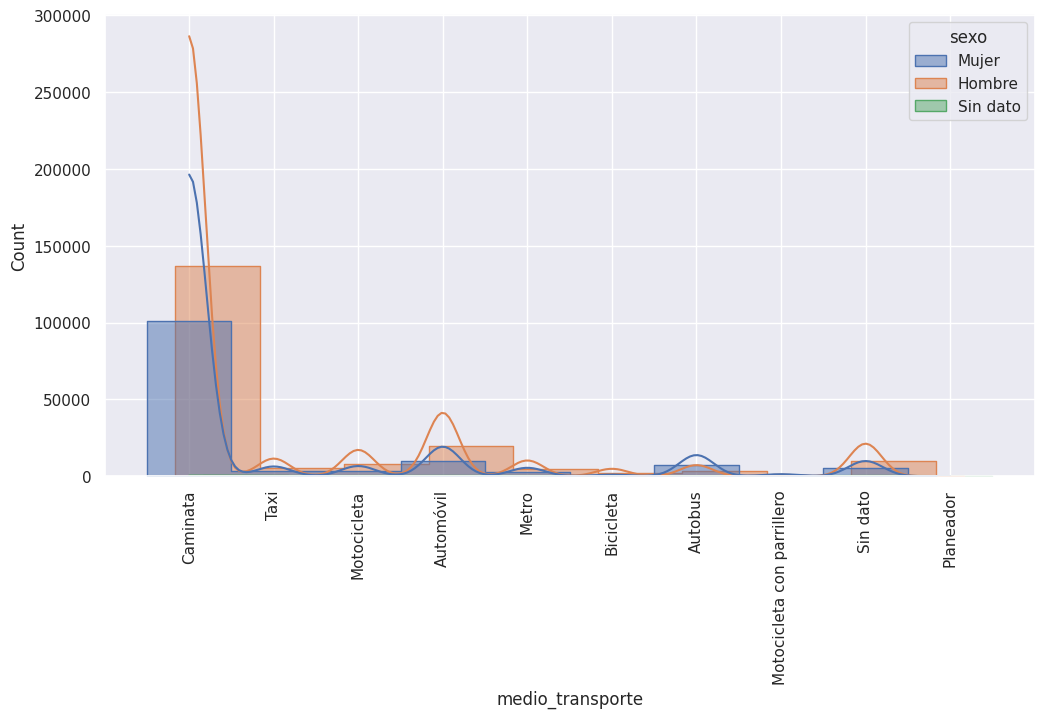

In [174]:
# prompt: como hago que se vea mas grande una visualizacion de catplot de seaborn

import matplotlib.pyplot as plt

# ... (your existing code)

sns.set(rc={'figure.figsize':(12,6)}) # adjust the size of the visualization here

sns.catplot(
    data=tbHurto_a_persona,
    x="modalidad",
    y="edad",
    hue="sexo",
    kind="bar" # “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count”
)
plt.xticks(rotation=45, fontsize=8)
plt.show()
